# Lec 5

# Add Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [14]:
#Use images from Internet

from PIL import Image # to open images
import requests # to get images from URLs
from io import BytesIO # to store images


image = Image.open("Monkey_D_Luffy.png")



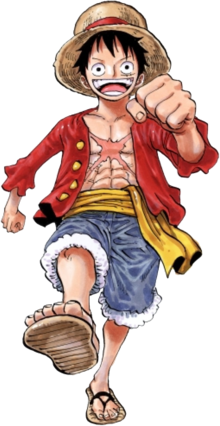

In [15]:
image

(np.float64(-0.5), np.float64(219.5), np.float64(425.5), np.float64(-0.5))

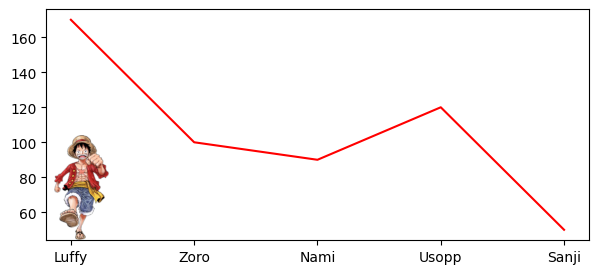

In [24]:
# Add plot

# first make our sample data
x = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])
y2 = np.array([170, 100, 90, 120, 50])


fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(x, y2, color = "red")

# Create a box at the bottom left
ax_image = fig.add_axes([0.1, # x coordinate (ON FIGURE, NOT AXES)
0.11, # y coordinate (ON FIGURE, NOT AXES)
0.15, # image width
0.35]) # image height)

ax_image.imshow(image)
ax_image.axis('off') # Do not show boundaries



Save figure

In [ ]:
# define where we want to save
path = 'C:/Users/...'
# can be full path or relative path
filename = '/fig1a.png'
# save the visualization
plt.savefig(path+filename, dpi=300)
# note that path shouldn't end with / since filename starts with it

# Beyond Matplotlib

Seaborn is A data viz package built on top of matplotlib
• SIMILAR to matplotlib but takes care of some semantic mapping for us
• mapping is deciding which aspects of our dataset correspond to which visual elements on our plots

In [25]:
# Install and Load Packages
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


c:\Users\94469\OneDrive\桌面\visualization\visualization-env\Lib\site-packages\matplotlib_venn\_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



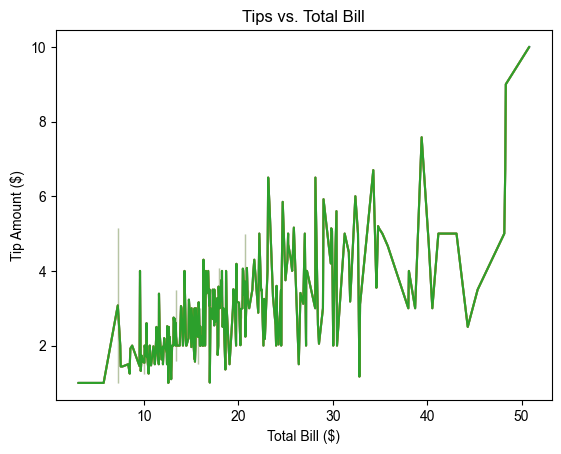

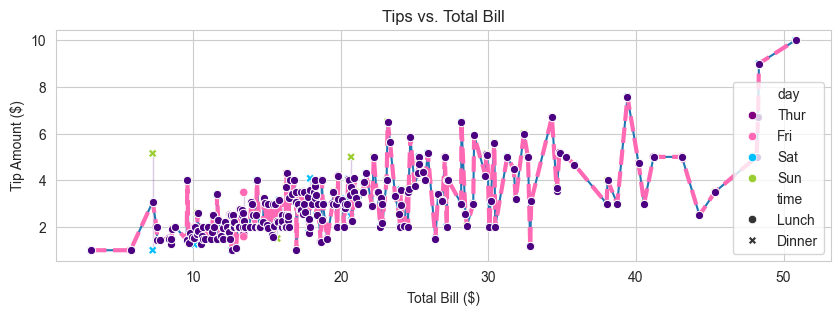

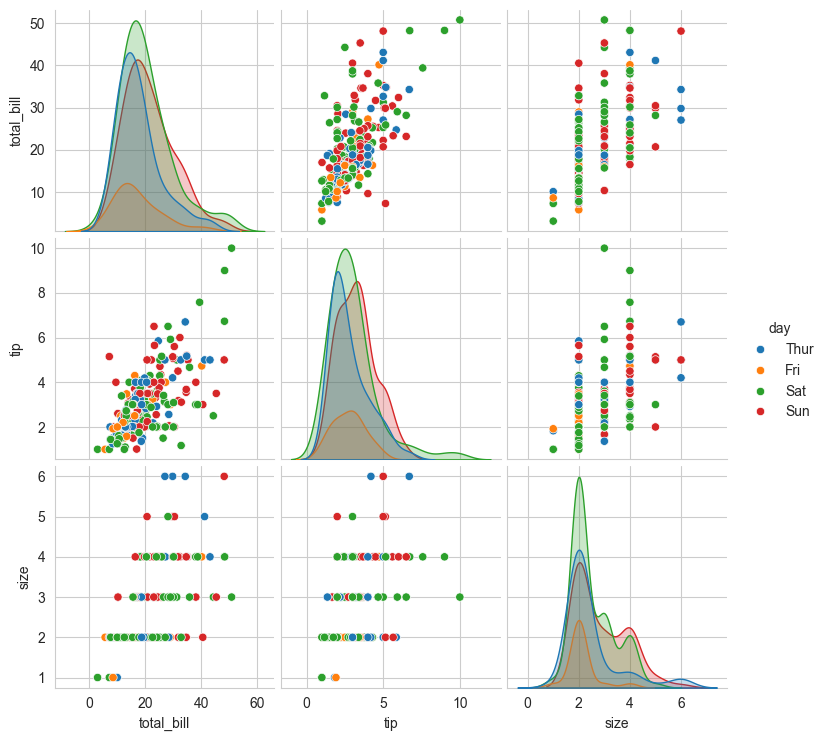

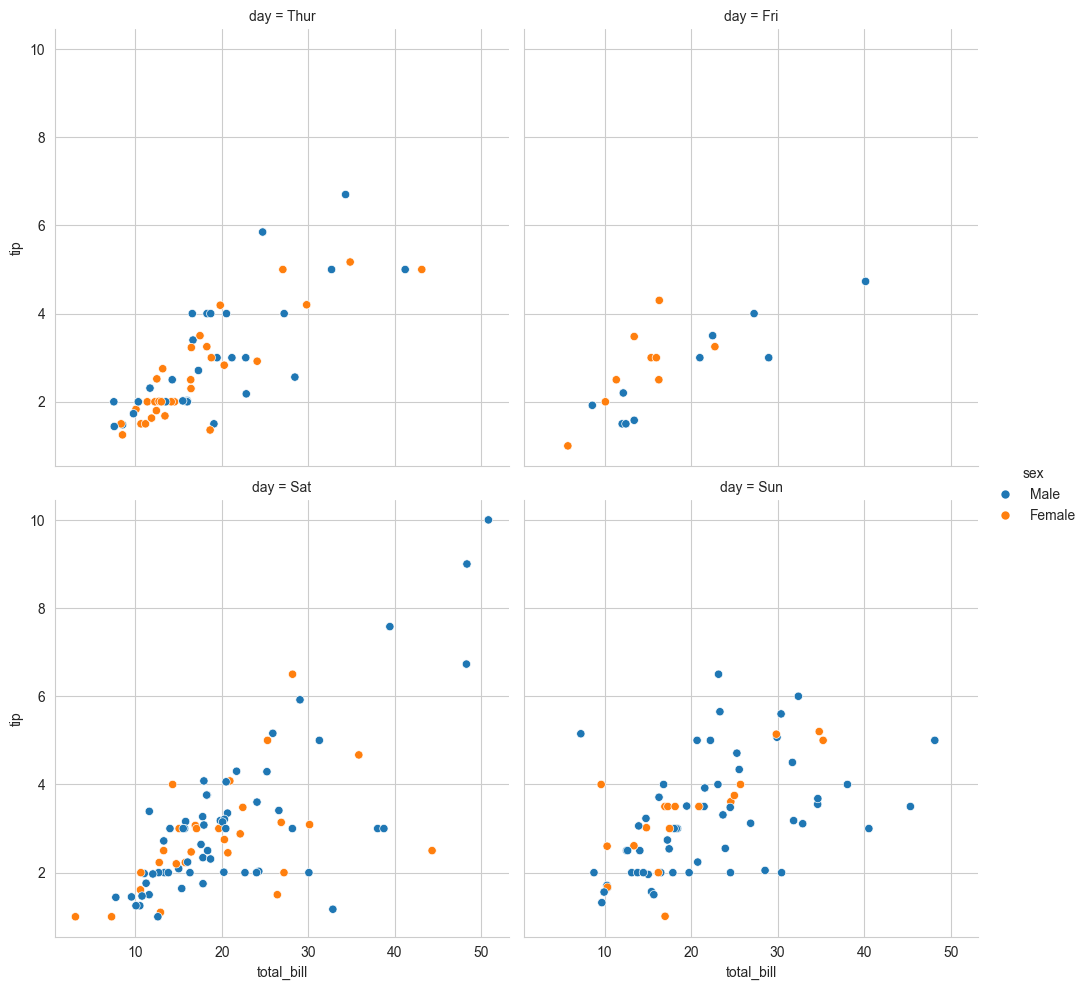

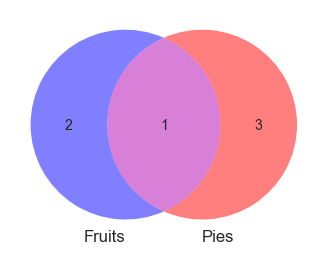

In [ ]:
# load Data
tips = sns.load_dataset("tips")
print(tips)

# Basic plots make a simple line plot of tip amount vs total bill
sns.lineplot(
    data=tips,
    x='total_bill',
    y='tip'
)

# Premade Style
sns.set_style('whitegrid')
sns.lineplot(data=tips, x='total_bill', y='tip')



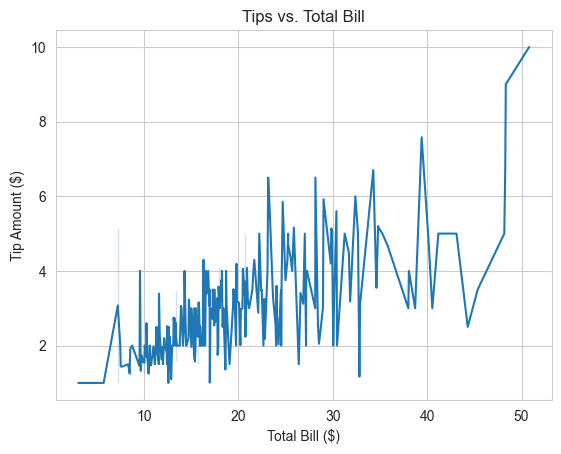

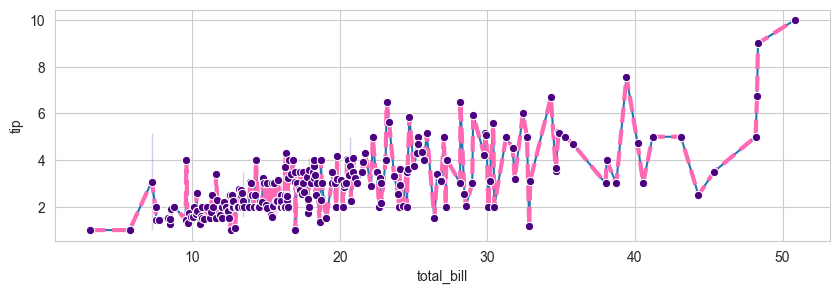

In [27]:
# Add titles and labels
tipgraph = sns.lineplot(
    data=tips,
    x='total_bill',
    y='tip'
)

tipgraph.set(
    title='Tips vs. Total Bill',
    xlabel='Total Bill ($)',
    ylabel='Tip Amount ($)'
)

# Modify Aesthetic elements
fig = plt.subplots(figsize=(10, 3))
sns.lineplot(data=tips, x='total_bill', y='tip')

# Customize line and marker style
tipgraph = sns.lineplot(
    data=tips,
    x='total_bill',
    y='tip',
    color='hotpink',
    linestyle='--',
    linewidth=3,
    marker='o',
    markerfacecolor='indigo'
)



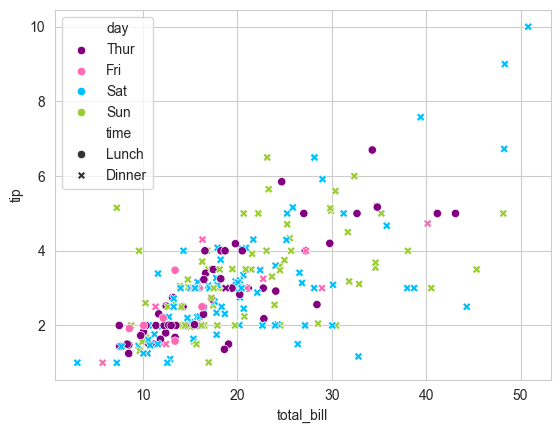

In [30]:
# Add multiple variables

# Add different styles to different data points
tipgraph = sns.scatterplot(
    data=tips,
    x='total_bill',
    y='tip',
    style='time',
    hue='day',
    palette=['purple', 'hotpink', 'deepskyblue', 'yellowgreen']
)

# Circles are all lunch and x are dinner, day are colours



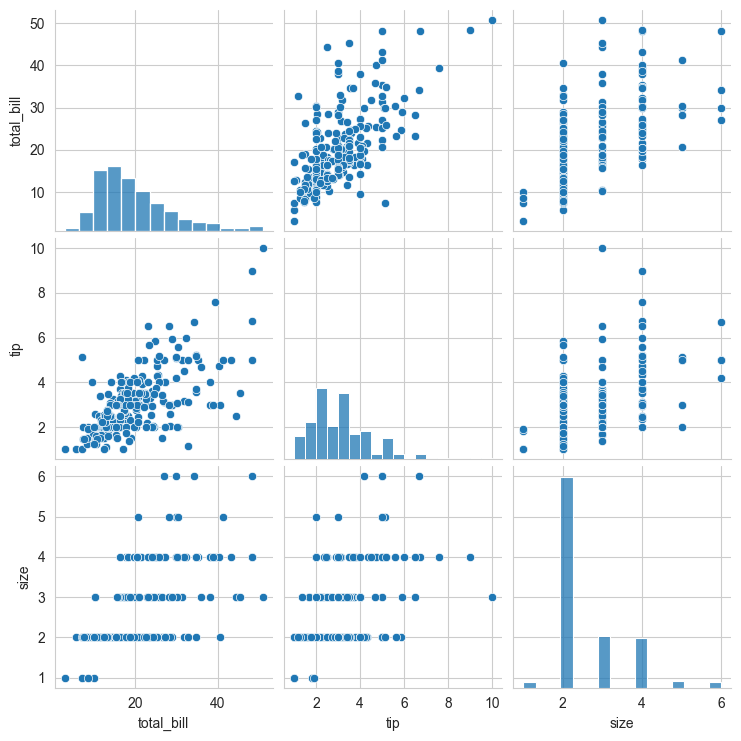

In [33]:
# Pair plots
sns.pairplot(
    data=tips
)

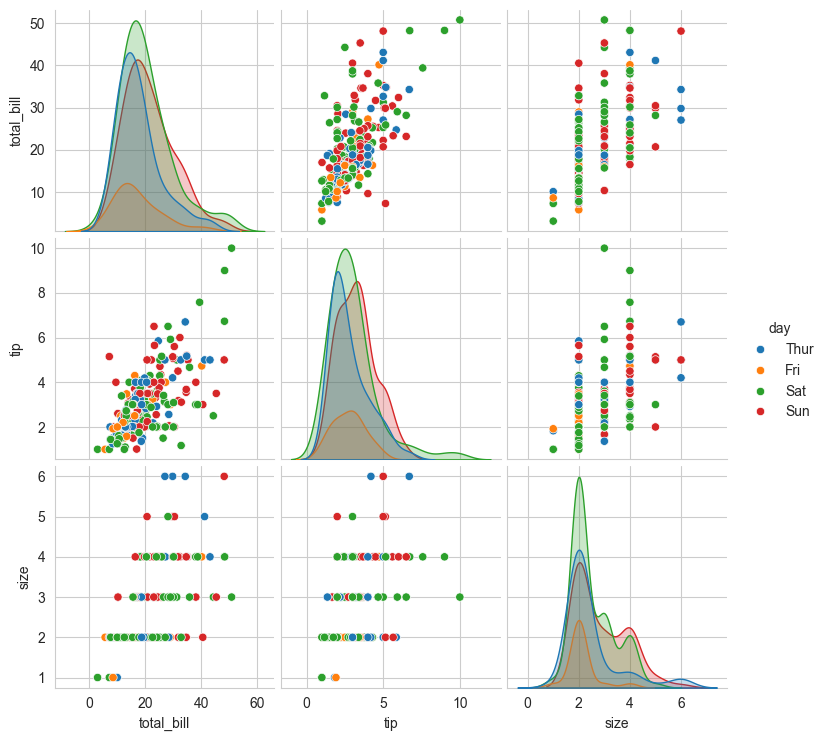

In [ ]:


# Pair plots
sns.pairplot(
    data=tips,
    hue='day' # colours represent days
)


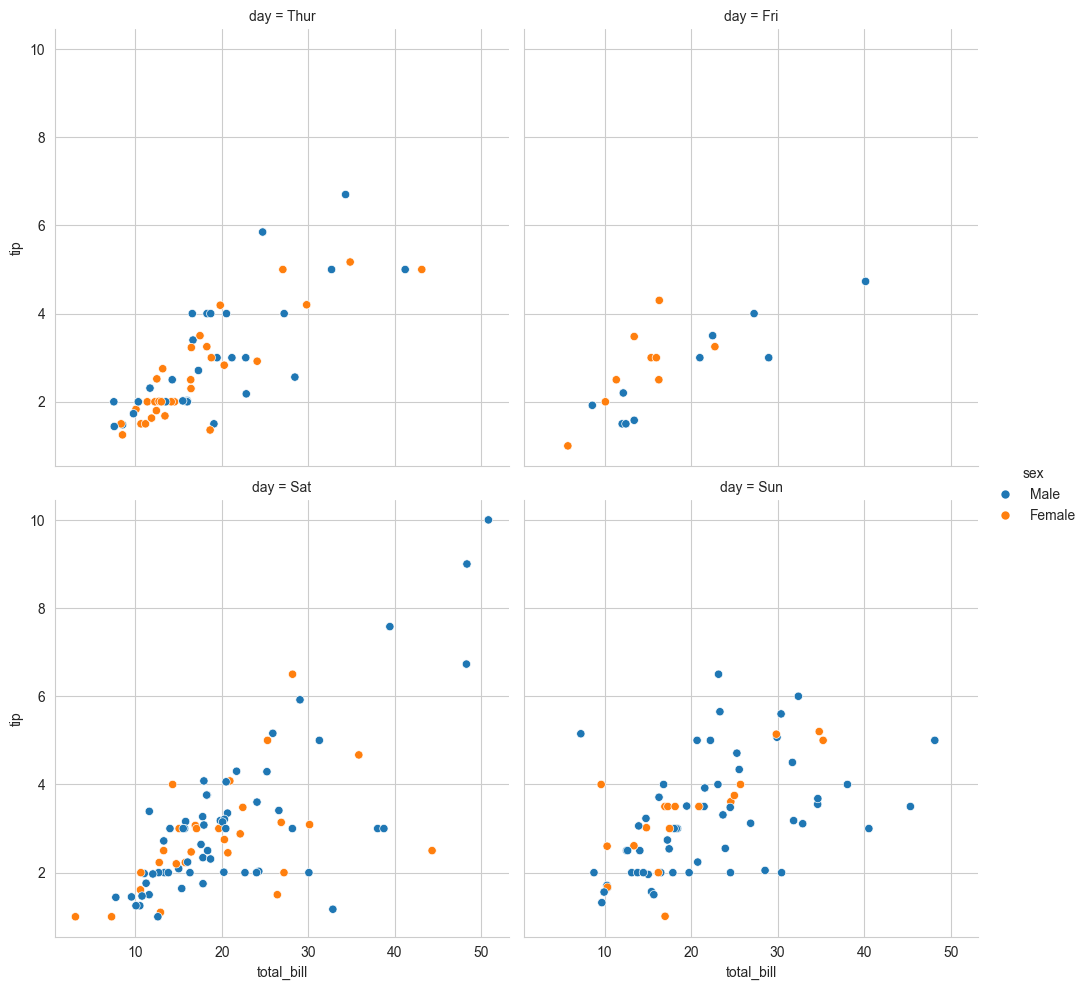

In [36]:

# Replot
daysplot = sns.relplot( # replot the same data
    data=tips,
    x="total_bill",
    y="tip",
    hue="sex", # colour based on sex
    col="day", # each plot is about one day
    kind="scatter",
    col_wrap=2 # 2 columns per row
)



c:\Users\94469\OneDrive\桌面\visualization\visualization-env\Lib\site-packages\matplotlib_venn\_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



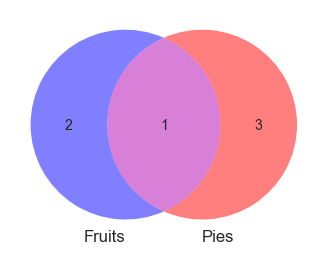

In [ ]:
# Plotly, good for create dynamic visuals

# Set up 
import plotly.graph_objects as go # 'go' is 'graph objects'

x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np.array([110, 180, 240, 99, 220])



In [ ]:
# Make figure
graph = go.Figure()
graph.add_trace(go.Bar(x=x1, y=y1))
# Choose plot type

# Include titles
graph.update_layout(
    title="Pirate Scores",
    xaxis_title="Pirates",
    yaxis_title="Score"
)
# Show plot
graph.show()

# this is an interactive plot

# export plotly graph
graph.write_html("pirategraph.html")



In [ ]:
# customize plotly graph
graph = go.Figure()

graph.add_trace(go.Scatter(
    x=x1,
    y=y1,
    mode='markers',
    marker=dict(
        size=15,
        color='hotpink',
        opacity=1,
        line=dict(width=5, color='purple')
    )
))


c:\Users\94469\OneDrive\桌面\visualization\visualization-env\Lib\site-packages\matplotlib_venn\_util.py:32: UserWarning:

venn2_unweighted is deprecated. Use venn2 with the appropriate layout_algorithm instead.



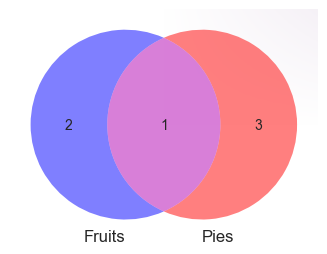

In [ ]:
# Set axis and size
graph.update_layout(
    title='Interactive Pirate Plot',
    xaxis_title='Pirates',
    yaxis_title='Scores',
    width=500,
    height=500
)

graph.show()



In [39]:
# Make Wordclouds
from wordcloud import WordCloud

df = pd.read_csv(
    "https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
    on_bad_lines='skip'
)



In [40]:
# make a simple word cloud using the ‘quote’ variable
text = " ".join(each for each in df.quote)

wordcloud = WordCloud(
    background_color="white",
    colormap='inferno'
).generate(text)



(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

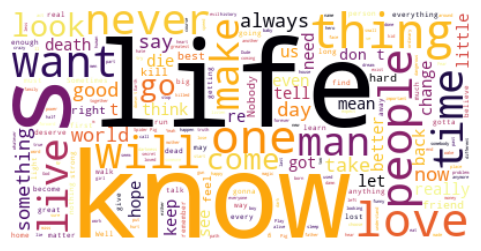

In [42]:
# Use matplotlib to put image in a figure
fig, ax = plt.subplots(figsize=(7, 3))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")







In [ ]:
# Making Venn diagrams
from matplotlib_venn import venn2_unweighted

A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

# Assign set to each circle, modify appearance
diagram = venn2_unweighted(
    [A, B],
    set_labels=('Fruits', 'Pies'),
    set_colors=("blue", "red"),
    alpha=0.5
)

plt.show()



# Modify Diagrams
diagram.get_label_by_id("10").set_text("\n".join(A - B))
diagram.get_label_by_id("11").set_text("\n".join(A & B))
diagram.get_label_by_id("01").set_text("\n".join(B - A))

## Data Visualization: Visualization with Purpose - Data Visualization as Advocacy

Three elements of persuasion

Rational appeal Moral appeal Emotional appeal

Showed intense and scalable real life image

What we are not seeing is as important as what we are seeing, some data are meant to omitted and should think of why they are left out

Elements of dynamic data visualizations
1. Spatial elements
2. Retinal elements